# Random Digits Exercice

### Description:
This is an exercise in hypothesis testing, specifically determining if a series of digits [0,9] is random or not, and if the origin is human (i.e. yourself!). In order to determine this, one has to design and apply statistical tests, from which the degree of consistency of being random can be calculated.

### Your task:
Using tests of your choice/design, determine which of the seven data sets are consistent with being random, and which aren't. One is based on the digits you entered in the course questionaire, while the others range from obviously non-random over poor/quasi random to truly random. See if you among these can determine your (human) dataset.

###  Author: 
 - Troels Petersen ([petersen@nbi.dk](mailto:petersen@nbi.dk))

###  Date:
 - 7th of December 2022

---

In [70]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import seaborn as sns
import pandas as pd
import os, sys                                         # Modules to see files and folders in directories
from os.path import dirname as parent_folder

In [3]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [4]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

---
## Import random numbers from text file:

In [21]:
# Define list of input files:
dataset_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] # between A and G
infiles = []
infiles.append(["data_RandomDigits2022_" + letter + ".txt" for letter in dataset_letters]) 
infiles = infiles[0]
infiles

['data_RandomDigits2022_A.txt',
 'data_RandomDigits2022_B.txt',
 'data_RandomDigits2022_C.txt',
 'data_RandomDigits2022_D.txt',
 'data_RandomDigits2022_E.txt',
 'data_RandomDigits2022_F.txt',
 'data_RandomDigits2022_G.txt']

In [64]:
df_all = []

for i, ifile in enumerate(infiles):
    df = pd.read_csv(ifile, names=[dataset_letters[i]])
    df[dataset_letters[i]] = df[dataset_letters[i]].apply(list)
    df = df.explode(dataset_letters[i], ignore_index=True)
    df_all.append(df.astype(int))

df = pd.concat(df_all, axis=1, join='outer')

# df = pd.read_csv(infiles[0], names=[infiles[0]])
# df[infiles[0]] = df[infiles[0]].apply(list)
# df[infiles[0]] = df.explode(infiles[0])
# df.explode(infiles[0])

df

,A,B,C,D,E,F,G
0,5,3,4,5,9,8,0
1,2,9,1,0,1,5,6
2,9,7,2,7,6,9,3
3,6,5,0,4,6,6,4
4,3,1,5,6,9,4,2
...,...,...,...,...,...,...,...
5582,4,8,8,9,2,0,3
5583,1,7,4,0,4,2,9
5584,8,4,7,4,4,1,7
5585,5,0,1,8,0,5,1


In [65]:
df.mean()

A    4.500984
B    4.465187
C    4.441382
D    4.556828
E    4.435475
F    4.684983
G    4.604976
dtype: float64

In [66]:
df.std()

A    2.871541
B    2.878678
C    2.874246
D    2.868858
E    2.846078
F    2.758562
G    2.934699
dtype: float64

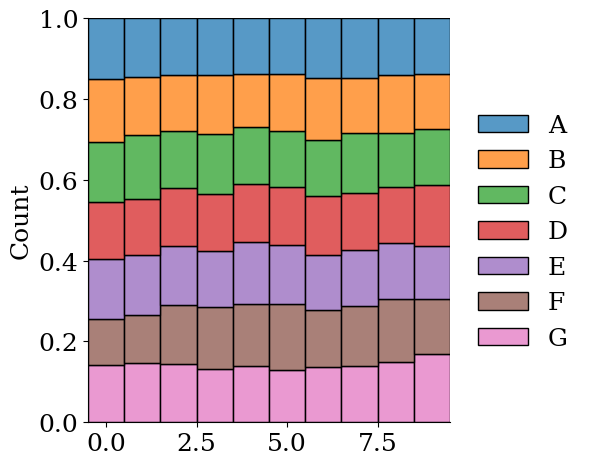

In [110]:
sns.displot(df, multiple='fill', discrete=True)

<AxesSubplot: >

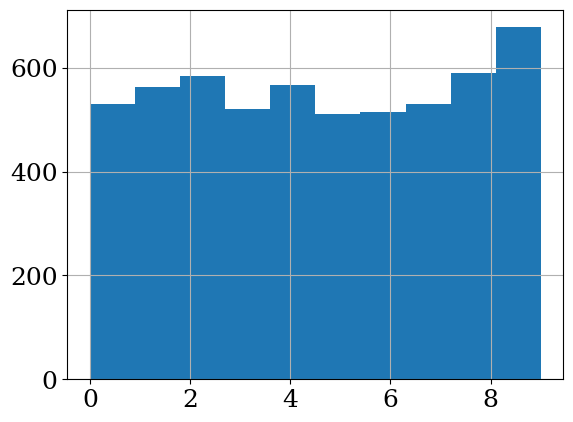

In [113]:
df['G'].hist()

---
## Define your tests:

Here is an example plot from the data, just for convenience. It is all up to you from here...

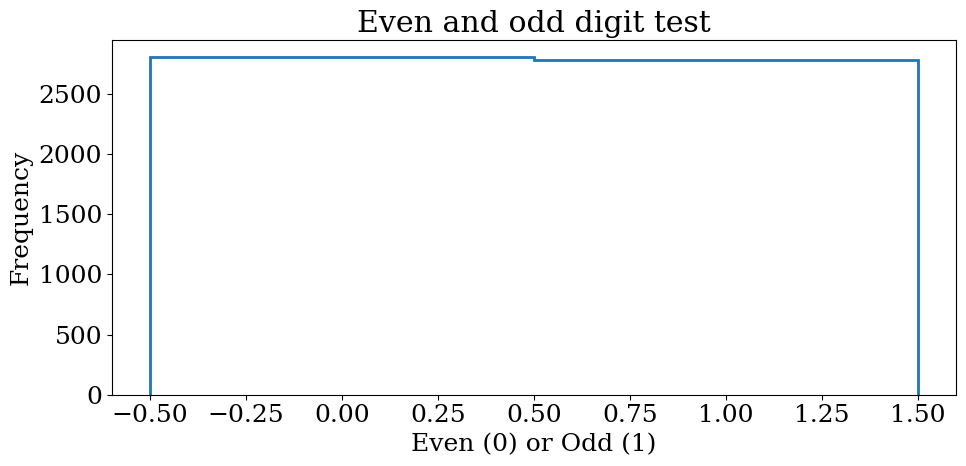

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.hist(numbers%2, bins=2, range=(-0.5, 1.5), histtype='step', density=False, lw=2)         
ax.set(xlabel="Even (0) or Odd (1)", ylabel="Frequency", title="Even and odd digit test")
fig.tight_layout()

### Comments on even/odd histogram:

What would you expect this distribution to be? Think about it, and then ask, if the distribution observed in data truly follows your expectation. Afterwards, think about the many other tests, that you can perform.

### Note on general goal of hypothesis tests:
Given the outcome of some test, you should try to convert it to a probability or number of sigmas (same thing). Thus determine what you expect, and then see what you observe and what uncertainty your observation has... and determine if this is consistent with the (null) hypothesis, that the data is truly random digits.

Questions:
---
 1. Discuss with your peers, what criteria truly random numbers should satisfy, and how these criteria can be tested.
    Based on this and on the discussion in class, write up such tests, and run all the datasets through your tests to
    see if some do not seem to be truly random.

 2. While one dataset is truly random, another consists of decimals from $\pi$. Apart from your own data, the other
    data sets are the result of using random numbers, but applying shifting, copying, and using biased selections.
    The non-human data sets are thus supposedly more regular (in some sense) than the humanly generated one. See if
    you can determine which one is "your" (humanly generated) data.

# Learning points:

This exercise should generally make you capable of:
1. Designing (simple) hypothesis tests
2. Coding them up
3. Applying them to data
4. Interpreting the results

You should be highly aware, that a fully correct test may not "discover" anything, even if there is an effect. For example, testing if two samples are alike, and checking if the means are consistent is a test. And they may be consistent, even if the two samples are _very_ different.

However, if just **one** test shows a significant deviation from a hypothesis, then this hypothesis fails.